In [8]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
RESULTS_DIR = './results'
NUMBER_OF_IMAGES = 20

In [10]:
tool_results = {}

# List all files in the results directory
files = os.listdir(RESULTS_DIR)

# Read each file and extract the time values for each operation
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    tool_name = os.path.splitext(file)[0]
    if 'readme' in tool_name:
        continue

    tool_name = tool_name.replace('-results', '')
    tool_results[tool_name] = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

        crop_times = [float(time) for time in lines[:NUMBER_OF_IMAGES]]
        compress_times = [float(time) for time in lines[NUMBER_OF_IMAGES:2 * NUMBER_OF_IMAGES]]
        resize_times = [float(time) for time in lines[2 * NUMBER_OF_IMAGES:3 * NUMBER_OF_IMAGES]]
        convert_times = [float(time) for time in lines[3 * NUMBER_OF_IMAGES:4 * NUMBER_OF_IMAGES]]

        tool_results[tool_name]['crop'] = crop_times
        tool_results[tool_name]['compress'] = compress_times
        tool_results[tool_name]['resize'] = resize_times
        tool_results[tool_name]['convert'] = convert_times

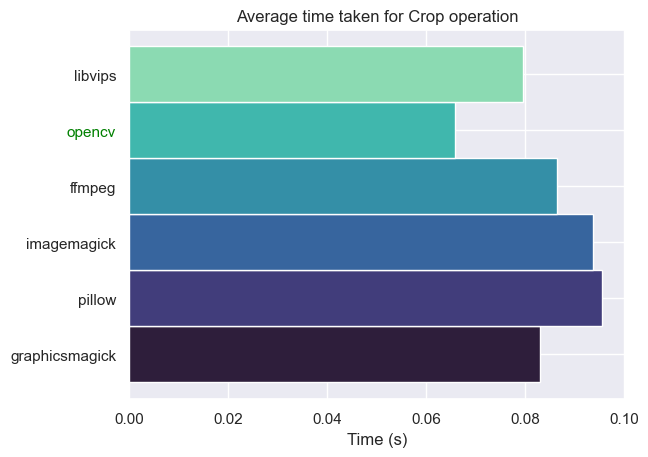

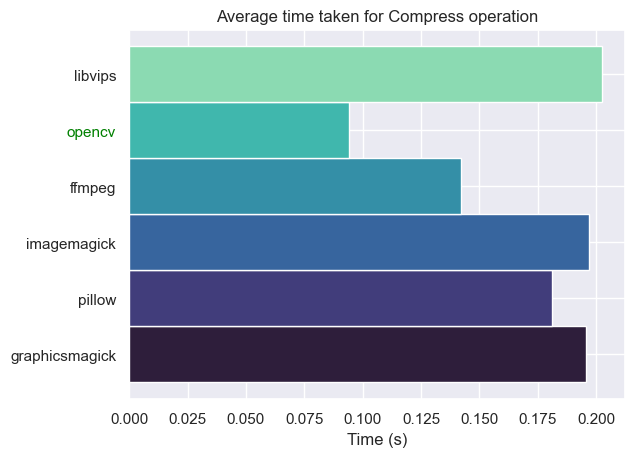

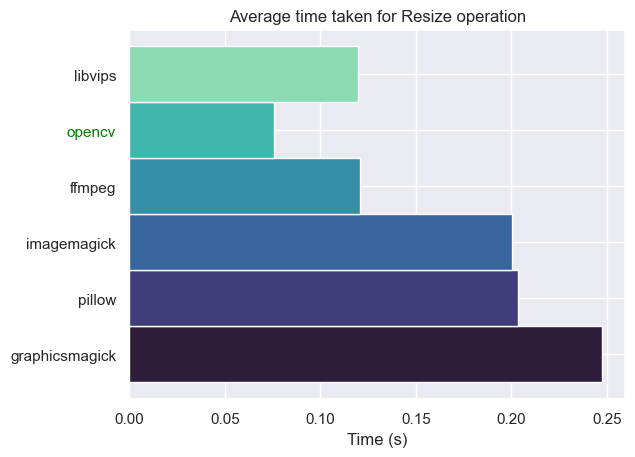

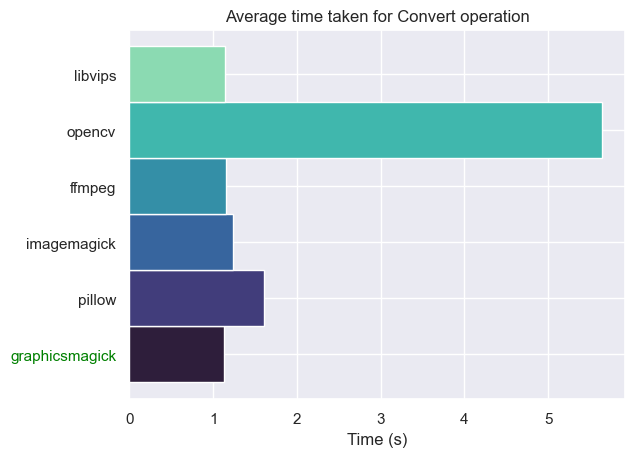

In [11]:
# create separate plots for each operation
operations = ['crop', 'compress', 'resize', 'convert']
for operation in operations:
    fig, ax = plt.subplots()
    bar_width = 1
    index = range(len(tool_results))
    sns.set()
    colors = sns.color_palette('mako', len(tool_results))
    times = [(tool, sum(results[operation]) / NUMBER_OF_IMAGES) for tool, results in tool_results.items()]
    min_time_tool, min_time = min(times, key=lambda item: item[1])
    for i, (tool, results) in enumerate(tool_results.items()):
        time = sum(results[operation]) / NUMBER_OF_IMAGES
        ax.barh(i, time, bar_width, label=tool, color=colors[i])

    ax.set_xlabel('Time (s)')
    ax.set_title(f'Average time taken for {operation.capitalize()} operation')
    ax.set_yticks(index)
    yticklabels = ax.set_yticklabels(tool_results.keys())

    # change the color of the y-tick label that corresponds to the tool with the lowest time
    for label in yticklabels:
        if label.get_text() == min_time_tool:
            label.set_color('green')

    plt.show()